In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/university-students-mental-health/mentalhealth_dataset.csv


#### Ignore Warnings

In [2]:
import warnings

# Suppress warnings for specific modules or operations
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*doesn't match format.*")


In [3]:
import pandas as pd

#### Load the dataset

In [4]:
df=pd.read_csv('/kaggle/input/university-students-mental-health/mentalhealth_dataset.csv')

In [5]:
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


#### Check the null value

In [6]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64

### Visualize the distribution of numerical columns

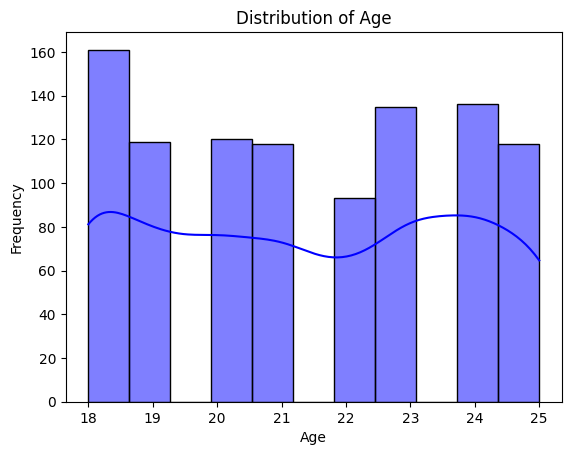

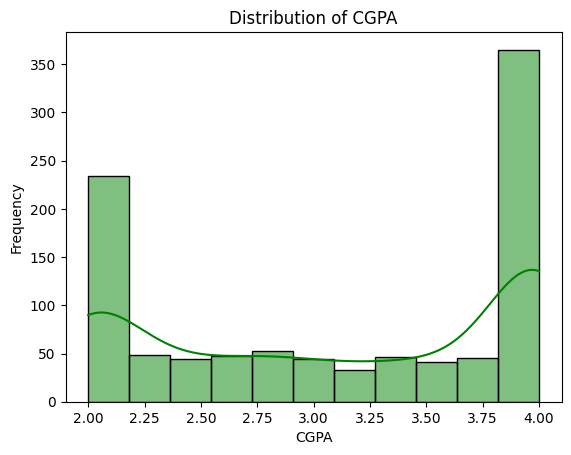

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Age
sns.histplot(data=df, x='Age', kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of CGPA
sns.histplot(data=df, x='CGPA', kde=True, color='green')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


### Bar Plots for Categorical Data

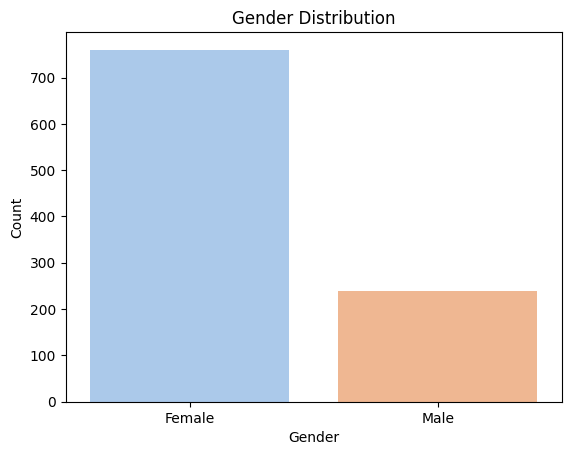

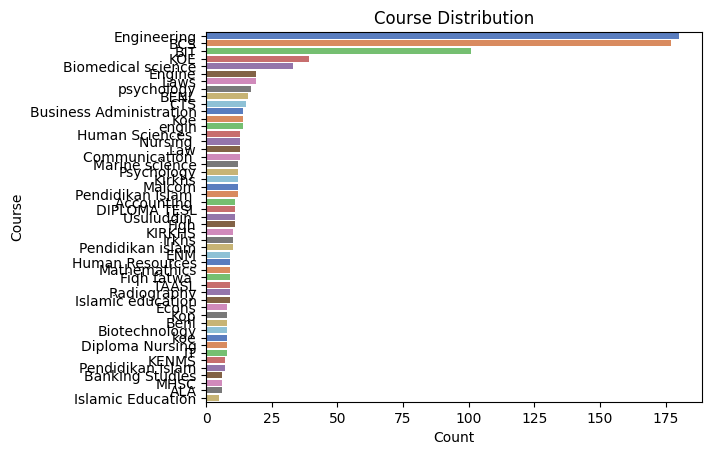

In [8]:
# Gender distribution
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Course distribution
sns.countplot(data=df, y='Course', palette='muted', order=df['Course'].value_counts().index)
plt.title('Course Distribution')
plt.xlabel('Count')
plt.ylabel('Course')
plt.show()


### Correlation Heatmap

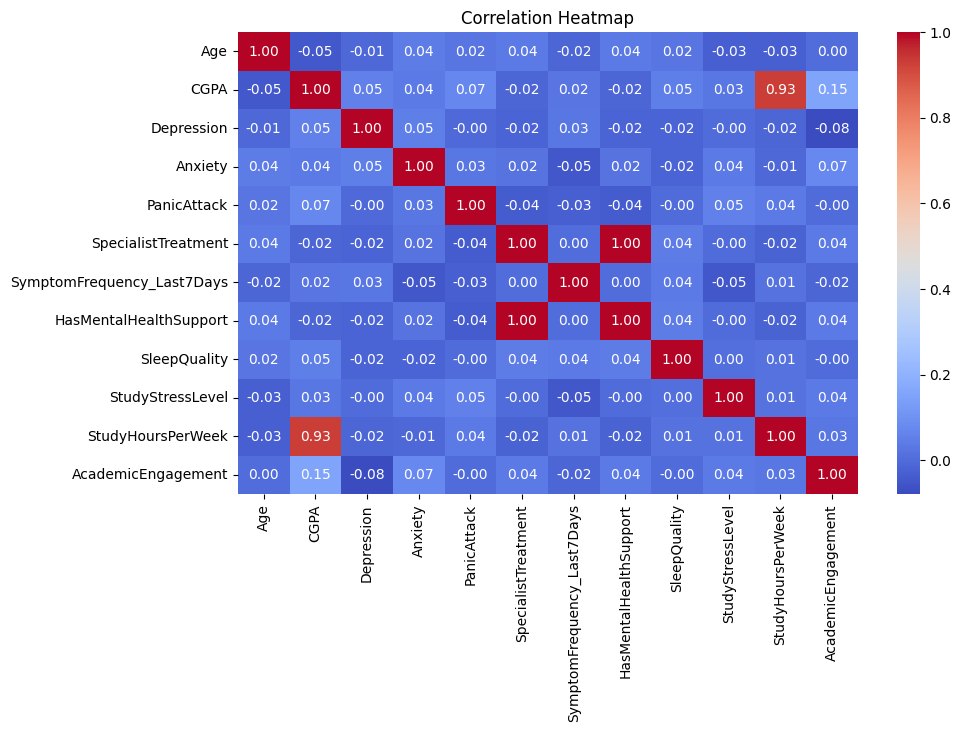

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Mental Health Insights

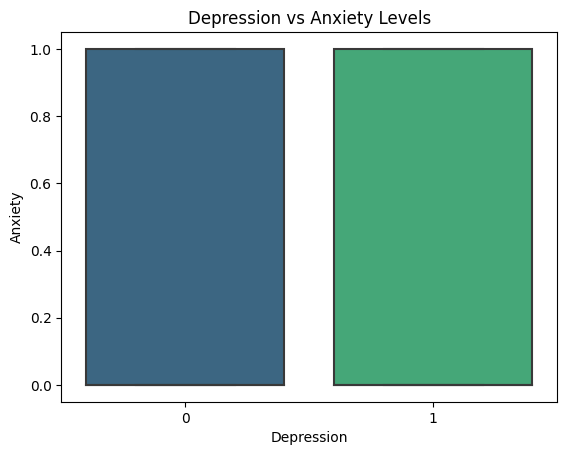

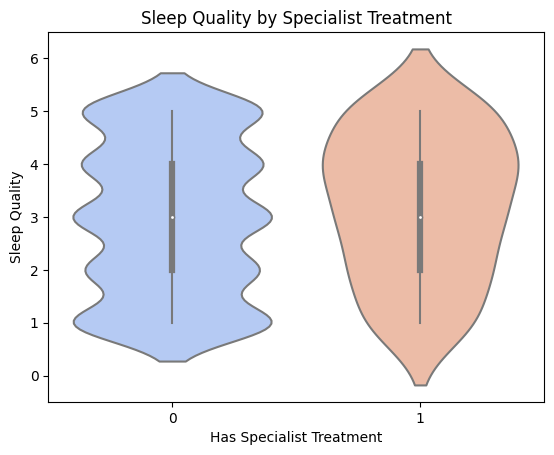

In [10]:
# Depression vs Anxiety
sns.boxplot(data=df, x='Depression', y='Anxiety', palette='viridis')
plt.title('Depression vs Anxiety Levels')
plt.xlabel('Depression')
plt.ylabel('Anxiety')
plt.show()

# Sleep Quality and Specialist Treatment
sns.violinplot(data=df, x='SpecialistTreatment', y='SleepQuality', palette='coolwarm')
plt.title('Sleep Quality by Specialist Treatment')
plt.xlabel('Has Specialist Treatment')
plt.ylabel('Sleep Quality')
plt.show()


### Scatter Plot for Study Habits

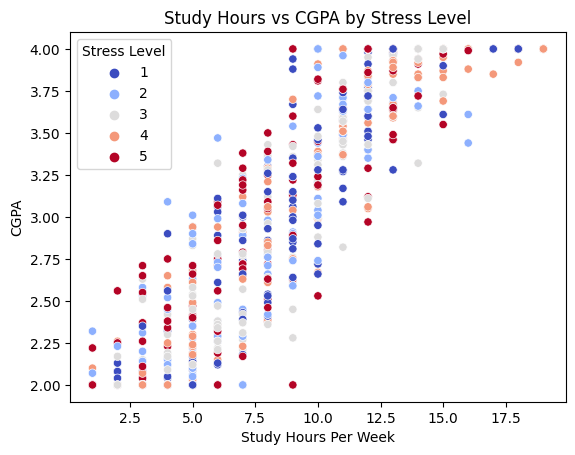

In [11]:
# Study hours per week vs CGPA
sns.scatterplot(data=df, x='StudyHoursPerWeek', y='CGPA', hue='StudyStressLevel', palette='coolwarm')
plt.title('Study Hours vs CGPA by Stress Level')
plt.xlabel('Study Hours Per Week')
plt.ylabel('CGPA')
plt.legend(title='Stress Level')
plt.show()


### Time-Based Analysis

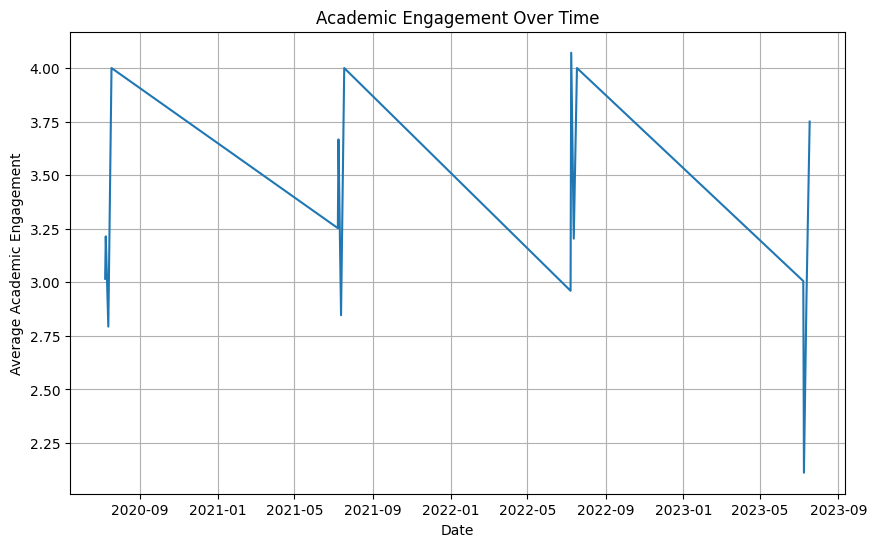

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

# Time trend for Academic Engagement
df.groupby(df['Timestamp'].dt.date)['AcademicEngagement'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Academic Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Average Academic Engagement')
plt.grid(True)
plt.show()


### Advanced: Mental Health vs Academic Performance

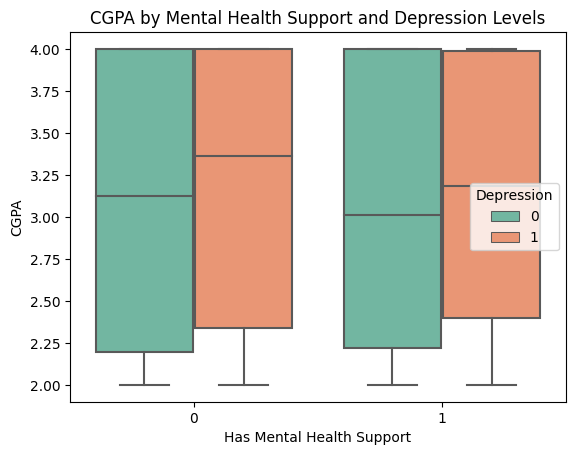

In [13]:
sns.boxplot(data=df, x='HasMentalHealthSupport', y='CGPA', hue='Depression', palette='Set2')
plt.title('CGPA by Mental Health Support and Depression Levels')
plt.xlabel('Has Mental Health Support')
plt.ylabel('CGPA')
plt.legend(title='Depression')
plt.show()
